# AIM : Comparative Analysis of Classification Metrics: Confusion Matrix, ROC, Precision, Recall and Accuracy with their use cases
**Name : Trideep Nandi**

**Class : CS4**

**Batch: 2**

**Enrollment : 0827CS211248**

* Accuracy gives an overall picture of model performance but might be misleading in the presence of class imbalance.
* Precision and recall provide insights into how well the model identifies positive instances and avoids false positives, respectively.
* F1 score balances precision and recall, making it suitable for imbalanced datasets.
* ROC AUC evaluates the model's ability to discriminate between classes, making it useful for assessing performance across different thresholds.

# Classification Metrics

## Confusion Matrix

* **Definition :**
    A confusion matrix is a table that is often used to describe the performance of a classification model. It contains information about actual and predicted classifications done by a classification system. Performance measures like accuracy, precision, recall, and F1 score are derived from it.

  * **Use Case :**
    It's used when you want to understand the types of errors made by the model. For example, in medical testing, a confusion matrix can help understand the types of misdiagnoses made by a test.

## ROC (Receiver Operating Characteristic)

* **Definition :**
    ROC is a probability curve that plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve.

* **Use Case :**
    It's used when you want to compare the performance of different models or to optimize the threshold of a given model. For example, in spam detection, an ROC curve can help find the right balance between catching spam and not marking legitimate mail as spam.

## Precision

* **Definition :**
    Precision is the ratio of correctly predicted positive observations to the total predicted positives. It's a measure of a classifier's exactness.

* **Use Case :**
    It's used when the cost of false positives is high. For example, in email spam detection, a high precision means that an email marked as spam is indeed spam, which is important because users don’t want to miss important emails marked as spam.

## Recall (Sensitivity)

* **Definition :**
    Recall is the ratio of correctly predicted positive observations to all observations in actual class. It's a measure of a classifier's completeness.

* **Use Case :**
    It's used when the cost of false negatives is high. For example, in fraud detection, a high recall means that a large number of frauds are caught, which is important because failing to identify a fraudulent transaction can be costly.

## Accuracy

* **Definition :**
    Accuracy is the ratio of correctly predicted observations to the total observations. It's the most intuitive performance measure.

* **Use Case :**
    It's used when the classes are balanced and errors of both kinds (false positives and false negatives) have similar costs. For example, in image classification, where each image can only belong to one class and each class is equally important, accuracy can be a good measure of the model's performance.

## 1. Dataset Selection

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Model Training:

For simplicity, we'll train a Logistic Regression classifier using scikit-learn.

In [2]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 3. Model Evaluation:

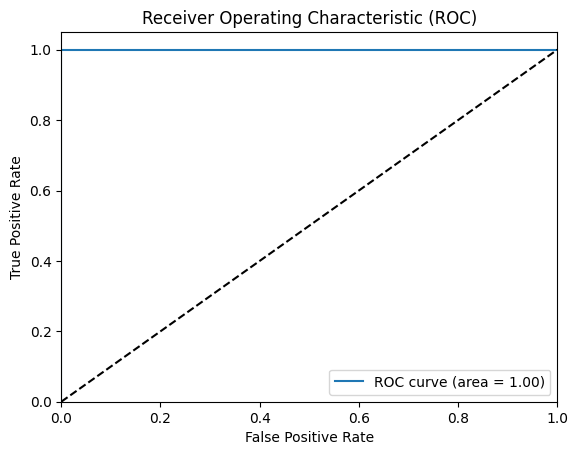

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


In [3]:
# Import necessary libraries and functions
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall of the model
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred, average='weighted')

# Get the probability estimates for the test set
y_probs = model.predict_proba(X_test)

# Compute the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')

# Compute the false positive rate, true positive rate, and thresholds to plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Set the limits of x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the labels of x and y axes and the title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

# Place a legend on the plot
plt.legend(loc="lower right")

# Display the plot
plt.show()

# Print the computed metrics and the confusion matrix
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

## 4. Summary:

* For balanced datasets like Iris, accuracy is generally reliable. However, in scenarios with class imbalance, precision, recall, and F1 score provide a better understanding of model performance.
* Precision is important when minimizing false positives is crucial, while recall is vital when capturing all positive instances is a priority.
* F1 score balances precision and recall, making it suitable for scenarios where both metrics are important.
* ROC AUC provides a comprehensive view of model performance across different thresholds and is useful when the trade-off between true positive rate and false positive rate needs to be considered.